In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# **Load the Data**

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# **Preparing data**

In [6]:
#Drop customerID column
df = df.drop(['customerID'], axis=1)

In [7]:
#Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
#Handle missing values in TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True) # Fill the missing values with the mean

C:\Users\mrfor\AppData\Local\Temp\ipykernel_18076\4279432543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True) # Fill the missing values with the mean


### **Encode categorical columns**

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


- We remove irrelevant columns
- Convert TotalCharges to numeric, replace missing values with mean
- Categorical variables are encoded using LabelEncoder for numerical representation

# **EDA**

### **Churn distribution**

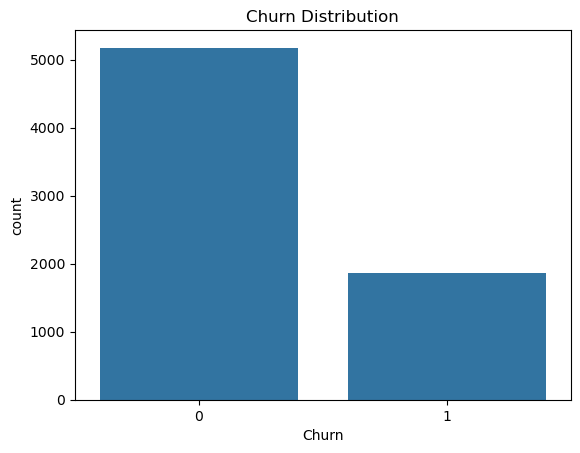

In [13]:
sns.countplot(x='Churn', data=df) # 0 - for no, 1 - for yes
plt.title('Churn Distribution')
plt.show()

### **Correlation heatmap**

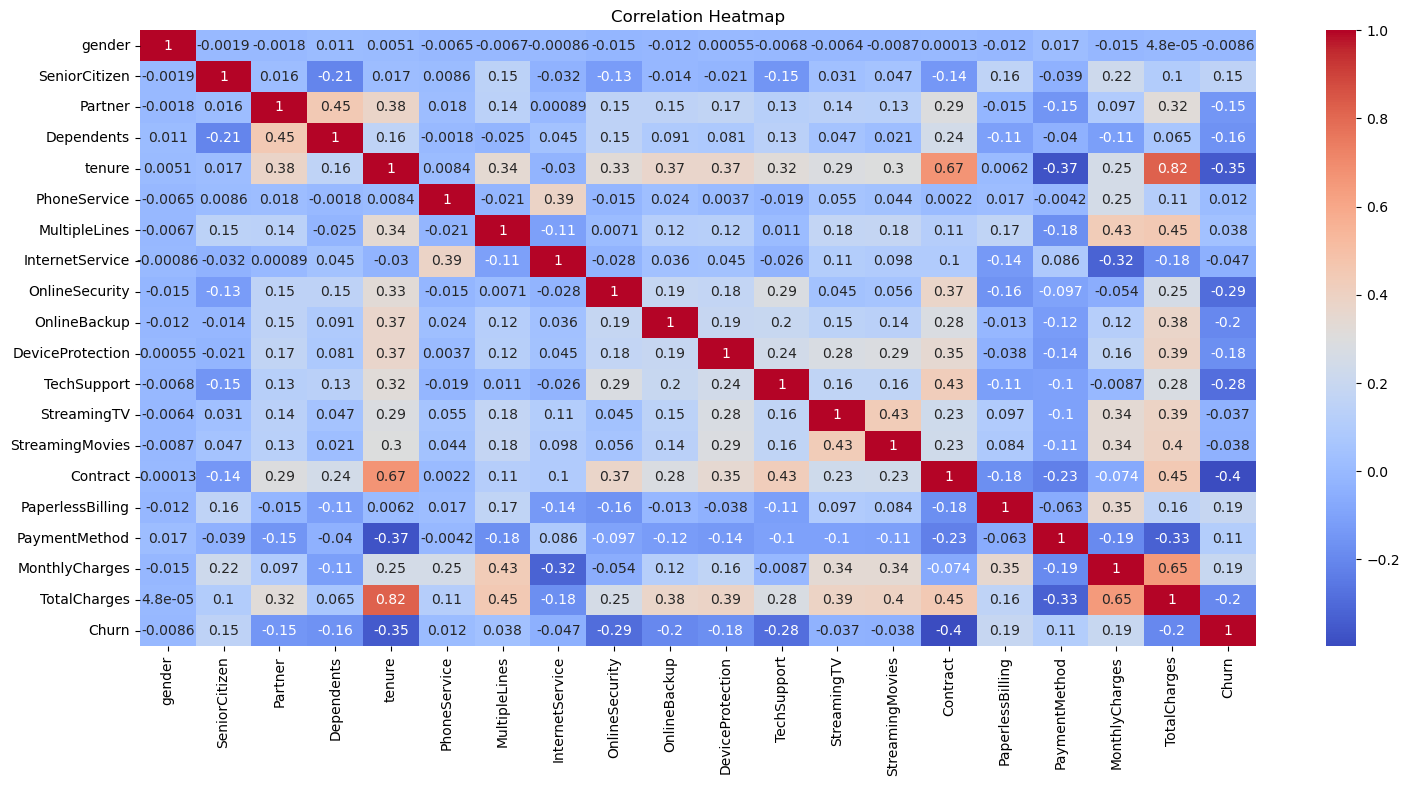

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Churn distribution shows us the balance between churned vs. non-churned
- Correlation heatmap identifies features strongly correlated with churn, e.g. **tenure** (negatively correlated) or **MonthlyCharges** (positive correlated)

# **Split the data into Training and Test sets**

In [19]:
#Split
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
#Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#scale the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Why standardize? - Scaling ensures that all features are on the same scale, which is important for algorithms like XGBoost

# **Train XGBoost model**

In [24]:
xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic', # Binary Classification
    eval_metric = 'logloss', # Disable default label encoding
    random_state = 42
)

In [27]:
#Train model
xgb_model.fit(X_train, y_train)
#Make prediction
y_pred = xgb_model.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy:  0.7821149751596878
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.50      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



### **Evaluate the model**

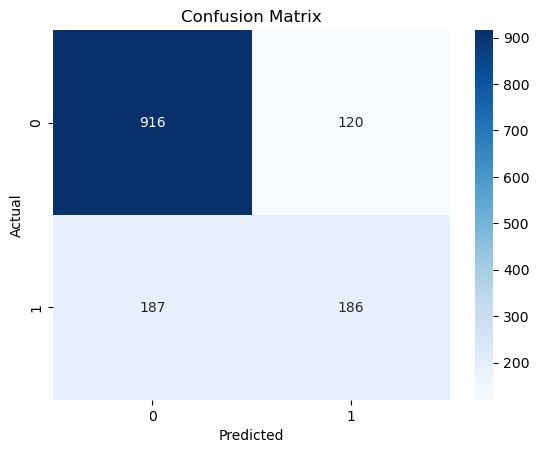

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Parameter Tuning**

In [30]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01, 0.1, 0.2]
}

In [31]:
#Grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [32]:
#train with best parameters
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
#evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print('Improved Accuracy:', accuracy_best)

Improved Accuracy: 0.8133427963094393


- **Customers with lower tenure (new customers) churn more frequently.**
- **Higher MonthlyCharges are positively correlated with churn.**
- **Contracts with shorter terms show higher churn rates**